In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#   M1       M2       mu      tb      mnt1      mnt2      mnt3      mnt4      mch1      mch2   excl  Rvalue   chi^2   -2logLike   analysis   topology
dt1 = np.dtype([('M1', float), ('M2', float), ('mu', float), ('tanb', float), 
               ('mnt1',float), ('mnt2',float), ('mnt3',float), ('mnt4',float), ('mch1',float), ('mch2',float), 
               ('ExclStatus', int), ('Rval', float), ('Chi2', float), ('llhd', float), 
               ('analysis', 'U40'), ('Tx', 'U80')])

In [4]:
allPts = np.genfromtxt('randscan1.dat', dtype=dt1, usecols=range(0,16));

In [5]:
len(allPts)

4570

In [6]:
filterAllowed = [ (d['ExclStatus']<1) for d in allPts ]
filterExcluded = [ (d['ExclStatus']==1) for d in allPts ]
allowedPts = allPts[filterAllowed]
exclPts = allPts[filterExcluded]

In [7]:
[len(allowedPts),len(exclPts),len(allowedPts)+len(exclPts)]

[3157, 1413, 4570]

In [9]:
np.unique(exclPts['analysis'],return_counts = True)

(array(['ATLAS-SUSY-2016-06', 'ATLAS-SUSY-2016-24', 'ATLAS-SUSY-2017-01',
        'ATLAS-SUSY-2017-03', 'ATLAS-SUSY-2018-06', 'ATLAS-SUSY-2018-32',
        'ATLAS-SUSY-2019-08', 'CMS-SUS-16-039', 'CMS-SUS-17-004'],
       dtype='<U40'),
 array([ 90,  21,   2,  23,   5, 303, 483,   2, 484]))

In [8]:
np.unique(exclPts['Tx'],return_counts = True)

(array(["'TChiWH", "'TChiWW", "'TChiWZ", "'TChiWZoff", "'TDTM1F,"],
       dtype='<U80'),
 array([485, 303, 511,  24,  90]))

In [11]:
exclWH = exclPts[ [ (d['Tx']=="'TChiWH") for d in exclPts ] ]
exclWW = exclPts[ [ (d['Tx']=="'TChiWW") for d in exclPts ] ]
exclWZ = exclPts[ [ (d['Tx']=="'TChiWZ" or d['Tx']=="'TChiWZoff" ) for d in exclPts ] ]
exclDT = exclPts[ [ (d['Tx']=="'TDTM1F,") for d in exclPts ] ]
[len(exclWH),len(exclWW),len(exclWZ),len(exclDT)]

[485, 303, 535, 90]

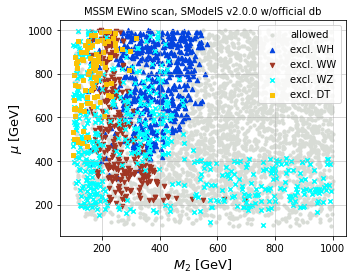

In [72]:
fig = plt.figure(figsize=(5,4))
plt.grid(alpha=0.6)
plt.scatter(allowedPts['M2'],allowedPts['mu'], c='xkcd:light grey', marker="o", s=10, alpha=1, label=r'allowed')
plt.scatter(exclWH['M2'],exclWH['mu'], c='xkcd:blue', marker="^", s=20, alpha=1, label=r'excl. WH')
plt.scatter(exclWW['M2'],exclWW['mu'], c='xkcd:brick', marker="v", s=20, alpha=1, label=r'excl. WW')
plt.scatter(exclWZ['M2'],exclWZ['mu'], c='xkcd:cyan', marker="x", s=20, alpha=1, label=r'excl. WZ')
plt.scatter(exclDT['M2'],exclDT['mu'], c='xkcd:goldenrod', marker="s", s=20, alpha=1, label=r'excl. DT')
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
fig.savefig('ewino_smoexcl_M2_mu_tx.png', dpi=150)

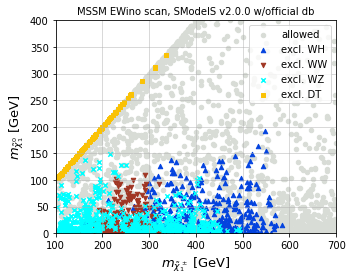

In [73]:
fig = plt.figure(figsize=(5,4))
plt.xlim(100, 700)
plt.ylim(0, 400)
plt.grid(alpha=0.6)
plt.scatter(allowedPts['mch1'],allowedPts['mnt1'], c='xkcd:light grey', marker="o", s=20, alpha=1, label=r'allowed')
plt.scatter(exclWH['mch1'],exclWH['mnt1'], c='xkcd:blue', marker="^", s=20, alpha=1, label=r'excl. WH')
plt.scatter(exclWW['mch1'],exclWW['mnt1'], c='xkcd:brick', marker="v", s=20, alpha=1, label=r'excl. WW')
plt.scatter(exclWZ['mch1'],exclWZ['mnt1'], c='xkcd:cyan', marker="x", s=20, alpha=1, label=r'excl. WZ')
plt.scatter(exclDT['mch1'],exclDT['mnt1'], c='xkcd:goldenrod', marker="s", s=20, alpha=1, label=r'excl. DT')
plt.xlabel(r'$m_{\tilde\chi^\pm_1}$ [GeV]',fontsize=13)
plt.ylabel(r'$m_{\tilde\chi^0_1}$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
fig.savefig('ewino_smoexcl_mch1_mnt1_tx.png', dpi=150)

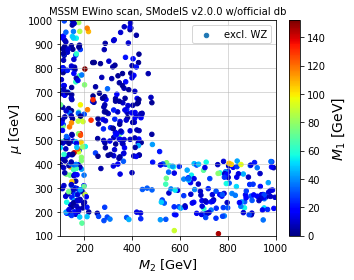

In [53]:
fig = plt.figure(figsize=(5,4))
plt.xlim(100, 1000)
plt.ylim(100, 1000)
plt.grid(alpha=0.6)
plt.scatter(exclWZ['M2'],exclWZ['mu'], c=exclWZ['M1'], cmap='jet', marker="o", s=20, alpha=1, vmin=0, label=r'excl. WZ')
cbar = plt.colorbar();
cbar.set_label(r'$M_1$ [GeV]', rotation=90,fontsize=14);
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('ewino_smoexclWZ_M2_mu_M1.png', dpi=150)

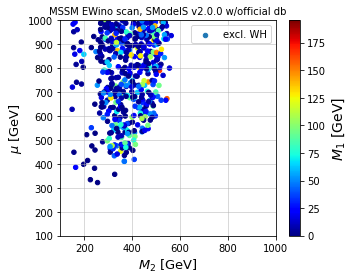

In [52]:
fig = plt.figure(figsize=(5,4))
plt.xlim(100, 1000)
plt.ylim(100, 1000)
plt.grid(alpha=0.6)
plt.scatter(exclWH['M2'],exclWH['mu'], c=exclWH['M1'], cmap='jet', marker="o", s=20, alpha=1, vmin=0, label=r'excl. WH')
cbar = plt.colorbar();
cbar.set_label(r'$M_1$ [GeV]', rotation=90,fontsize=14);
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('ewino_smoexclWH_M2_mu_M1.png', dpi=150)

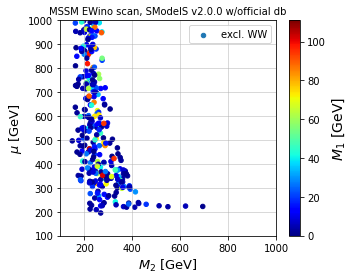

In [54]:
fig = plt.figure(figsize=(5,4))
plt.xlim(100, 1000)
plt.ylim(100, 1000)
plt.grid(alpha=0.6)
plt.scatter(exclWW['M2'],exclWW['mu'], c=exclWW['M1'], cmap='jet', marker="o", s=20, alpha=1, vmin=0, label=r'excl. WW')
cbar = plt.colorbar();
cbar.set_label(r'$M_1$ [GeV]', rotation=90,fontsize=14);
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('ewino_smoexclWW_M2_mu_M1.png', dpi=150)

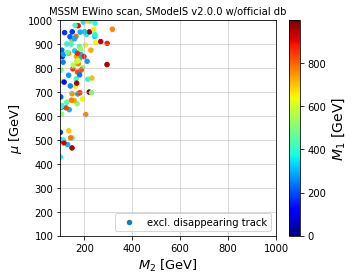

In [57]:
fig = plt.figure(figsize=(5,4))
plt.xlim(100, 1000)
plt.ylim(100, 1000)
plt.grid(alpha=0.6)
plt.scatter(exclDT['M2'],exclDT['mu'], c=exclDT['M1'], cmap='jet', marker="o", s=20, alpha=1, vmin=0, label=r'excl. disappearing track')
cbar = plt.colorbar();
cbar.set_label(r'$M_1$ [GeV]', rotation=90,fontsize=14);
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.legend(loc='lower right', frameon=True)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('ewino_smoexclDT_M2_mu_M1.png', dpi=150)

In [58]:
rmaxWH = allPts[ [ (d['Tx']=="'TChiWH") for d in allPts ] ]
rmaxWW = allPts[ [ (d['Tx']=="'TChiWW") for d in allPts ] ]
rmaxWZ = allPts[ [ (d['Tx']=="'TChiWZ" or d['Tx']=="'TChiWZoff" ) for d in allPts ] ]
rmaxDT = allPts[ [ (d['Tx']=="'TDTM1F,") for d in allPts ] ]
[len(rmaxWH),len(rmaxWW),len(rmaxWZ),len(rmaxDT)]

[2275, 560, 1225, 140]

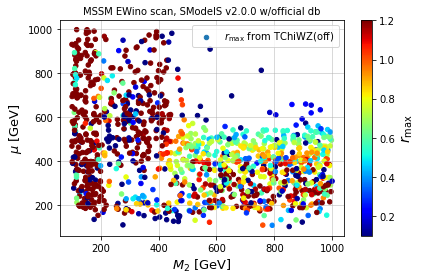

In [68]:
fig = plt.figure(figsize=(6,4))
plt.xlim(60, 1040)
plt.ylim(60, 1040)
plt.grid(alpha=0.6)
plt.scatter(rmaxWZ['M2'],rmaxWZ['mu'], c=rmaxWZ['Rval'], cmap='jet', s=20, alpha=1, vmin=0.1, vmax=1.2, 
            label=r'$r_{\rm max}$ from TChiWZ(off)')
cbar = plt.colorbar();
cbar.set_label(r'$r_{\rm max}$', rotation=90,fontsize=14);
plt.legend(loc='upper right', frameon=True)
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()

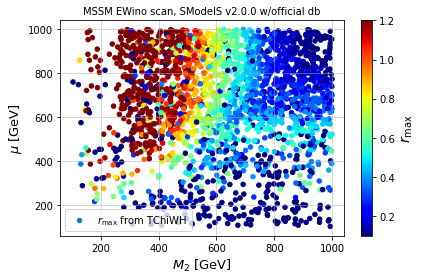

In [71]:
fig = plt.figure(figsize=(6,4))
plt.xlim(60, 1040)
plt.ylim(60, 1040)
plt.grid(alpha=0.6)
plt.scatter(rmaxWH['M2'],rmaxWH['mu'], c=rmaxWH['Rval'], cmap='jet', s=20, alpha=1, vmin=0.1, vmax=1.2, 
            label=r'$r_{\rm max}$ from TChiWH')
cbar = plt.colorbar();
cbar.set_label(r'$r_{\rm max}$', rotation=90,fontsize=14);
plt.legend(loc='lower left', frameon=True)
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()

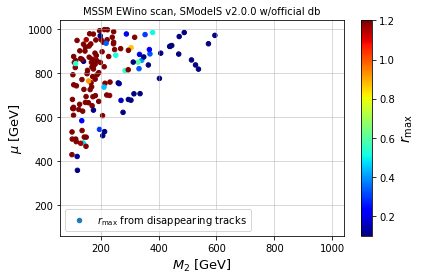

In [75]:
fig = plt.figure(figsize=(6,4))
plt.xlim(60, 1040)
plt.ylim(60, 1040)
plt.grid(alpha=0.6)
plt.scatter(rmaxDT['M2'],rmaxDT['mu'], c=rmaxDT['Rval'], cmap='jet', s=20, alpha=1, vmin=0.1, vmax=1.2, 
            label=r'$r_{\rm max}$ from disappearing tracks')
cbar = plt.colorbar();
cbar.set_label(r'$r_{\rm max}$', rotation=90,fontsize=14);
plt.legend(loc='lower left', frameon=True)
plt.xlabel(r'$M_2$ [GeV]',fontsize=13)
plt.ylabel(r'$\mu$ [GeV]',fontsize=13)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()

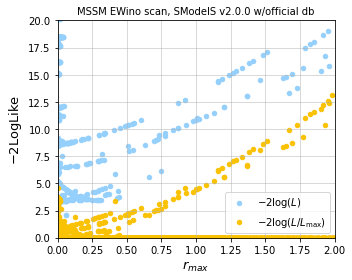

In [92]:
fig = plt.figure(figsize=(5,4))
plt.xlim(0, 2)
plt.ylim(0, 20)
plt.grid(alpha=0.6)
plt.scatter(allPts['Rval'], allPts['llhd'], c='xkcd:light blue', s=20, alpha=1, label=r'$-2\log(L)$')
plt.scatter(allPts['Rval'], allPts['Chi2'], c='xkcd:goldenrod', s=20, alpha=1, label=r'$-2\log(L/L_{\rm max})$')
#cbar.set_label(r'$m_{H^\pm}$ [GeV]', rotation=90,fontsize=14);
plt.legend(loc='lower right', frameon=True)
plt.xlabel(r'$r_{max}$',fontsize=13)
plt.ylabel(r'$-2$LogLike',fontsize=13)
plt.title(r'MSSM EWino scan, SModelS v2.0.0 w/official db',loc='center',fontsize=10)
plt.tight_layout()
plt.show()